In [1]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [2]:

def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist


In [3]:
def compute_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = np.abs(x[j]-y[i])
    return dist

In [4]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [15]:
df=pd.read_csv('../clean_data/score_list.csv')

In [19]:
df=df.drop(df.columns[0], axis=1)

In [20]:
df

,Jurisdiction,Average scale score
0,Alabama,"[230.0, 230.0, 232.0, 231.0, 233.0, 231.0, 228..."
1,Alaska,"[226.0, 232.0, 230.0, 236.0, 236.0, 236.0, 237..."
2,Arizona,"[232.0, 238.0, 234.0, 238.0, 240.0, 235.0, 230..."
3,Arkansas,"[228.0, 233.0, 234.0, 235.0, 240.0, 238.0, 238..."
4,California,"[230.0, 235.0, 232.0, 232.0, 234.0, 234.0, 232..."
5,Colorado,"[236.0, 242.0, 241.0, 242.0, 247.0, 244.0, 243..."
6,Connecticut,"[236.0, 243.0, 239.0, 240.0, 243.0, 242.0, 245..."
7,Delaware,"[226.0, 239.0, 236.0, 239.0, 243.0, 240.0, 239..."
8,Florida,"[241.0, 246.0, 246.0, 243.0, 242.0, 240.0, 242..."
9,Georgia,"[235.0, 238.0, 236.0, 236.0, 240.0, 238.0, 236..."


In [21]:
alabama=df['Average scale score'][0]
import ast
alabama_list = ast.literal_eval(alabama)
alaska_list=ast.literal_eval(df['Average scale score'][1])

In [23]:
alabama_list

[230.0, 230.0, 232.0, 231.0, 233.0, 231.0, 228.0, 229.0, 225.0, 223.0]

In [13]:
#alabama_list=[-3, 0, 0, 1, 0, -1, 1, 0, 0, -1, 5]
#alaska_list =[3, 4, 1, 1, 2, 2, 1, 3, 0, 1, -4]

In [24]:
import numpy as np

# Define a custom distance function that ensures 1-D inputs
def custom_euclidean(u, v):
    u = np.array(u).ravel()
    v = np.array(v).ravel()
    return euclidean(u, v)

In [26]:
dtw_distance, warp_path = fastdtw(alabama_list,alaska_list, dist=custom_euclidean) 

In [27]:
cost_matrix = compute_accumulated_cost_matrix(alabama_list,alaska_list)

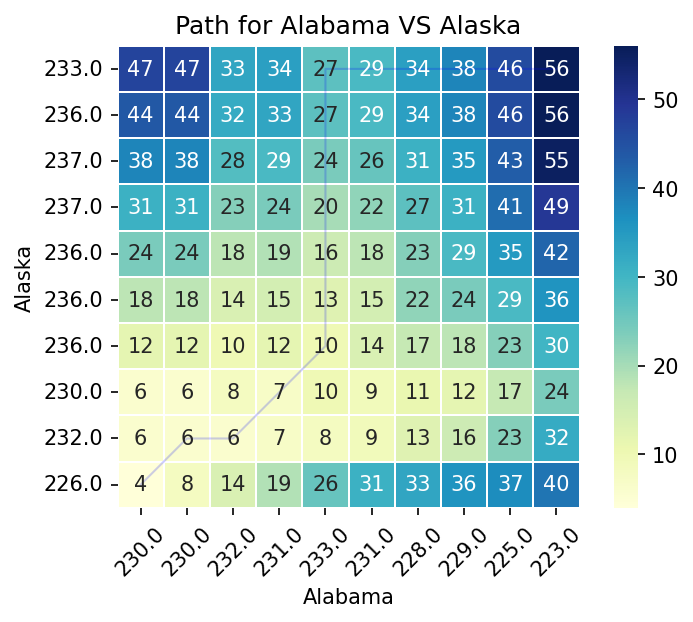

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Setting the x and y tick labels to alabama_list and alaska_list
ax.set_xticklabels(alabama_list, rotation=45)
ax.set_yticklabels(alaska_list, rotation=0)
ax.set_xlabel('Alabama')
ax.set_ylabel('Alaska')
ax.set_title('Path for Alabama VS Alaska')

# Adjusting ticks to align with the center of each cell
ax.set_xticks([i+0.5 for i in range(len(alabama_list))], minor=True)
ax.set_yticks([i+0.5 for i in range(len(alaska_list))], minor=True)
ax.grid(False)
ax.tick_params(which="minor", size=0)

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=1, alpha=0.2)

In [29]:
print("DTW distance: ", dtw_distance)
print("Warp path: ", warp_path)

DTW distance:  56.0
Warp path:  [(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


In [30]:
cost_matrix = compute_accumulated_cost_matrix(alabama_list,alaska_list)
print(np.flipud(cost_matrix)) 

[[47. 47. 33. 34. 27. 29. 34. 38. 46. 56.]
 [44. 44. 32. 33. 27. 29. 34. 38. 46. 56.]
 [38. 38. 28. 29. 24. 26. 31. 35. 43. 55.]
 [31. 31. 23. 24. 20. 22. 27. 31. 41. 49.]
 [24. 24. 18. 19. 16. 18. 23. 29. 35. 42.]
 [18. 18. 14. 15. 13. 15. 22. 24. 29. 36.]
 [12. 12. 10. 12. 10. 14. 17. 18. 23. 30.]
 [ 6.  6.  8.  7. 10.  9. 11. 12. 17. 24.]
 [ 6.  6.  6.  7.  8.  9. 13. 16. 23. 32.]
 [ 4.  8. 14. 19. 26. 31. 33. 36. 37. 40.]]


Text(0.5, 1.0, 'DTW Distance')

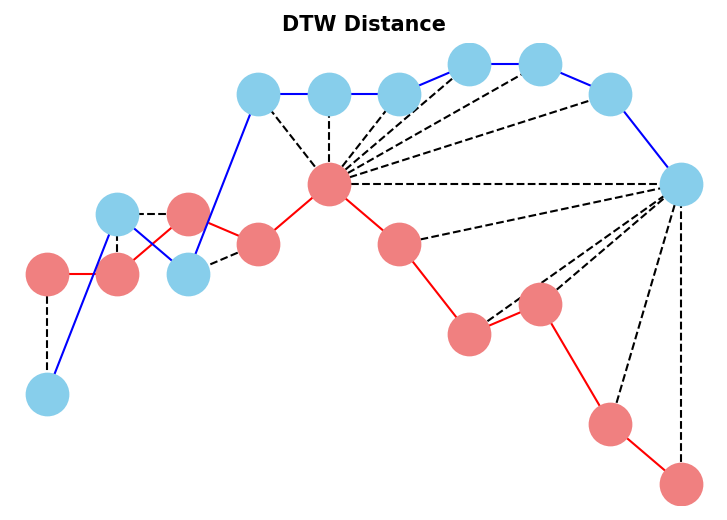

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [alabama_list[map_x], alaska_list[map_y]], '--k', linewidth=1)

ax.plot(alabama_list, '-ro', label='Alabama', linewidth=1, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(alaska_list, '-bo', label='Aalaska', linewidth=1, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')

ax.set_title("DTW Distance", fontsize=10, fontweight="bold")

In [32]:
from dtaidistance import dtw


In [33]:
distance=dtw.distance(alabama_list,alaska_list)

In [34]:
distance

17.26267650163207

In [35]:
from tslearn.metrics import dtw as ts_dtw
distance = ts_dtw(alabama_list,alaska_list)
print(f"DTW Distance: {distance}")

DTW Distance: 17.26267650163207


## Plot each states' distances

In [37]:
from ast import literal_eval
df['Average scale score'] = df['Average scale score'].apply(literal_eval)

In [38]:


# Redefine the number of states
num_states = len(df)

# Re-initialize the DTW distance matrix and compute the distances using the custom DTW implementation
dtw_matrix_custom = np.zeros((num_states, num_states))

for i in range(num_states):
    for j in range(i, num_states):
        if i == j:
            dtw_matrix_custom[i, j] = 0
        else:
            #distance = dtw.distance(df['Gaps'][i], df['Gaps'][j])
            distance, warp_path = fastdtw(df['Average scale score'][i], df['Average scale score'][j], dist=custom_euclidean) 
            dtw_matrix_custom[i, j] = dtw_matrix_custom[j, i] = distance

dtw_matrix_custom 

array([[  0.,  56.,  39., ...,  39., 129., 153.],
       [ 56.,   0.,  30., ...,  11.,  82., 106.],
       [ 39.,  30.,   0., ...,  22.,  71., 107.],
       ...,
       [ 39.,  11.,  22., ...,   0.,  90., 114.],
       [129.,  82.,  71., ...,  90.,   0.,  22.],
       [153., 106., 107., ..., 114.,  22.,   0.]])

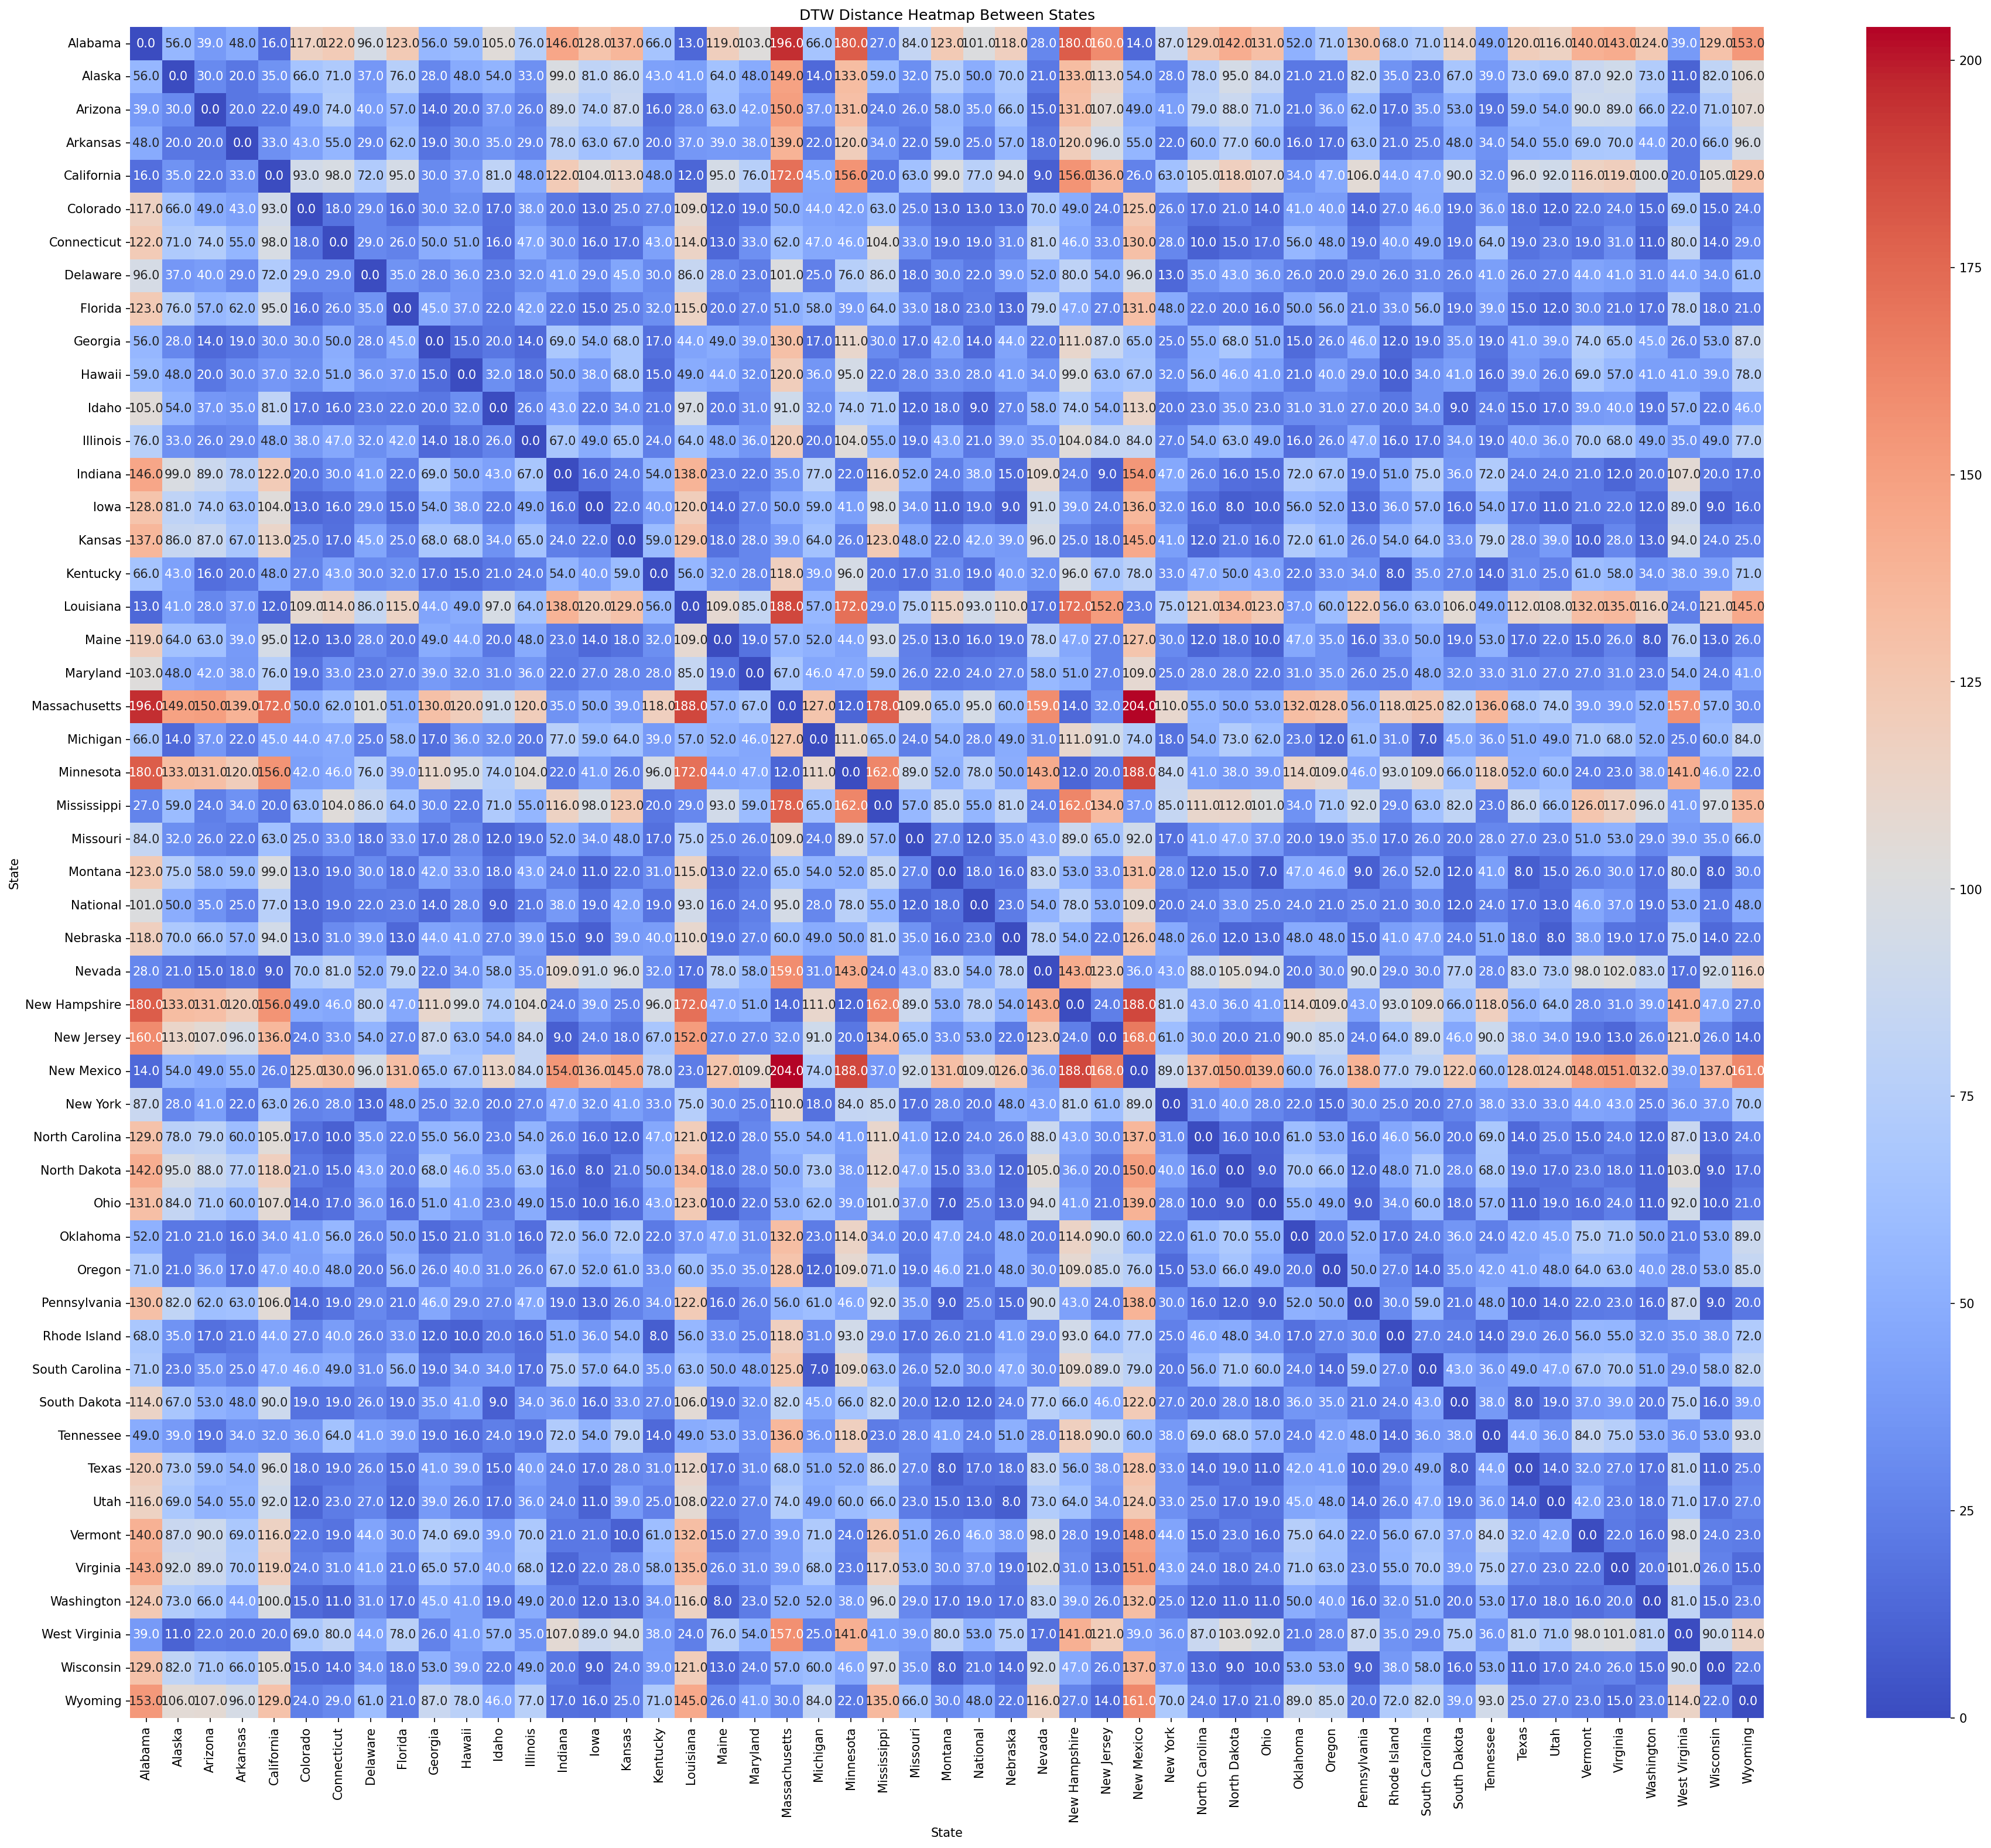

In [39]:


# Extract state names for axis labels
state_names = df['Jurisdiction'].values

# Create a heatmap of the DTW distance matrix
plt.figure(figsize=(30, 25))
sns.heatmap(dtw_matrix_custom, xticklabels=state_names, yticklabels=state_names, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('DTW Distance Heatmap Between States')
plt.xlabel('State')
plt.ylabel('State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [40]:
# Find the minimum value in the DTW distance matrix excluding the diagonal
min_value = np.min(dtw_matrix_custom[np.nonzero(dtw_matrix_custom)])

# Find the row and column indices of the minimum value
min_index = np.where(dtw_matrix_custom == min_value)

# Extract the corresponding states
state_1 = state_names[min_index[0][0]]
state_2 = state_names[min_index[1][0]]

min_value, state_1, state_2

(7.0, 'Michigan', 'South Carolina')

In [42]:
# Filter out the 'National' jurisdiction from the DataFrame
data_filtered = df[df['Jurisdiction'] != 'National']

# Redefine the number of states without 'National'
num_states_filtered = len(data_filtered)

# Initialize an empty matrix to store the DTW distances for the filtered data
dtw_matrix_filtered = np.zeros((num_states_filtered, num_states_filtered))

# Compute the DTW distance for each pair of states using the custom DTW implementation and store in the matrix
for i in range(num_states_filtered):
    for j in range(i, num_states_filtered):
        if i == j:
            dtw_matrix_filtered[i, j] = 0
        else:
            distance, warp_path = fastdtw(df['Average scale score'][i], df['Average scale score'][j], dist=custom_euclidean) 
            dtw_matrix_filtered[i, j] = dtw_matrix_filtered[j, i] = distance

# Find the minimum value in the filtered DTW distance matrix excluding the diagonal
min_value_filtered = np.min(dtw_matrix_filtered[np.nonzero(dtw_matrix_filtered)])

# Find the row and column indices of the minimum value in the filtered matrix
min_index_filtered = np.where(dtw_matrix_filtered == min_value_filtered)

# Extract the corresponding states from the filtered data
state_names_filtered = data_filtered['Jurisdiction'].values
state_1_filtered = state_names_filtered[min_index_filtered[0][0]]
state_2_filtered = state_names_filtered[min_index_filtered[1][0]]

min_value_filtered, state_1_filtered, state_2_filtered


(7.0, 'Michigan', 'South Dakota')

In [43]:

# Step 1: Flatten the upper triangular part of the matrix, excluding the diagonal
upper_tri_indices = np.triu_indices_from(dtw_matrix_filtered, k=1)  # k=1 excludes the diagonal
distances_flattened = dtw_matrix_filtered[upper_tri_indices]

# Step 2: Sort the flattened array and get indices of the 10 smallest distances
sorted_indices = np.argsort(distances_flattened)[:10]

# Step 3: Use the sorted indices to find the corresponding state pairs
state_pairs = [(state_names_filtered[i], state_names_filtered[j]) for i, j in zip(upper_tri_indices[0][sorted_indices], upper_tri_indices[1][sorted_indices])]

# Step 4: Extract the 10 minimum distances
min_distances = distances_flattened[sorted_indices]

# Combine the state pairs with their corresponding distances
min_distance_pairs = [(state_pairs[i], min_distances[i]) for i in range(len(min_distances))]

min_distance_pairs

[(('Montana', 'Oklahoma'), 7.0),
 (('Michigan', 'South Dakota'), 7.0),
 (('Montana', 'Wyoming'), 8.0),
 (('Montana', 'Utah'), 8.0),
 (('Tennessee', 'Utah'), 8.0),
 (('Maine', 'West Virginia'), 8.0),
 (('Kentucky', 'South Carolina'), 8.0),
 (('Iowa', 'Ohio'), 8.0),
 (('Nevada', 'Vermont'), 8.0),
 (('Montana', 'Rhode Island'), 9.0)]